In [1]:
import importlib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
from Utils import Preprocessing
from Models import ANN_1

2023-09-30 11:54:11.943276: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-30 11:54:12.049980: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-09-30 11:54:12.050011: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-09-30 11:54:12.050502: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-09-30 11:54:12.104635: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-30 11:54:12.105505: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [3]:
importlib.reload(Preprocessing)
importlib.reload(ANN_1)

<module 'Models.ANN_1' from '/home/davide/Desktop/Alzheimer_detection/Alzheimer_detection/Models/ANN_1.py'>

In [4]:
X_train = np.load('PCA_Data/X_train_pca_one_shot.npy')
y_train = np.load('PCA_Data/y_train.npy')
labels_list_train = np.load('PCA_Data/labels_list_train.npy')

X_test = np.load('PCA_Data/X_test_pca_one_shot.npy')
y_test = np.load('PCA_Data/y_test.npy')
labels_list_test = np.load('PCA_Data/labels_list_test.npy')

In [5]:
validation_percentage = 0.25
X_val = X_train[int(1-validation_percentage * len(X_train)):]
X_train = X_train[:int(1-validation_percentage * len(X_train))]
y_val = y_train[int(1-validation_percentage * len(y_train)):]
y_train = y_train[:int(1-validation_percentage * len(y_train))]
labels_list_val = labels_list_train[int(1-validation_percentage * len(labels_list_train)):]
labels_list_train = labels_list_train[:int(1-validation_percentage * len(labels_list_train))]

In [6]:
X_train.shape

(3842, 693)

In [7]:
X_val.shape

(1279, 693)

In [8]:
np.unique(y_train, return_counts=True)

(array([0.        , 0.00888585, 0.05329445, 1.        ]),
 array([1946, 1336,  520,   40]))

In [10]:
img_height=41
img_width=87

In [27]:
importlib.reload(ANN_1)
model = ANN_1.build_Model(input_shape=(693))
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 693)]             0         
                                                                 
 flatten_4 (Flatten)         (None, 693)               0         
                                                                 
 dense_18 (Dense)            (None, 300)               208200    
                                                                 
 dense_19 (Dense)            (None, 300)               90300     
                                                                 
 output_class_regression (D  (None, 1)                 301       
 ense)                                                           
                                                                 
Total params: 298801 (1.14 MB)
Trainable params: 298801 (1.14 MB)
Non-trainable params: 0 (0.00 Byte)
_______________________

In [28]:
hystory = model.fit(
    x=X_train,
    y=y_train,
    epochs=100,
    batch_size=32,
    shuffle=True,
    verbose=1,
    validation_data=(X_val, y_val),
)

Epoch 1/100
121/121 [==============================] - 1s 9ms/step - loss: 0.1248 - val_loss: 0.0689
Epoch 2/100
121/121 [==============================] - 1s 7ms/step - loss: 0.0559 - val_loss: 0.0718
Epoch 3/100
121/121 [==============================] - 1s 7ms/step - loss: 0.0379 - val_loss: 0.0275
Epoch 4/100
121/121 [==============================] - 1s 6ms/step - loss: 0.0243 - val_loss: 0.0251
Epoch 5/100
121/121 [==============================] - 1s 6ms/step - loss: 0.0161 - val_loss: 0.0271
Epoch 6/100
121/121 [==============================] - 1s 7ms/step - loss: 0.0149 - val_loss: 0.0220
Epoch 7/100
121/121 [==============================] - 1s 7ms/step - loss: 0.0119 - val_loss: 0.0216
Epoch 8/100
121/121 [==============================] - 1s 6ms/step - loss: 0.0100 - val_loss: 0.0233
Epoch 9/100
121/121 [==============================] - 1s 6ms/step - loss: 0.0082 - val_loss: 0.0185
Epoch 10/100
121/121 [==============================] - 1s 7ms/step - loss: 0.0072 - val_lo

<Axes: title={'center': 'Hystory loss'}>

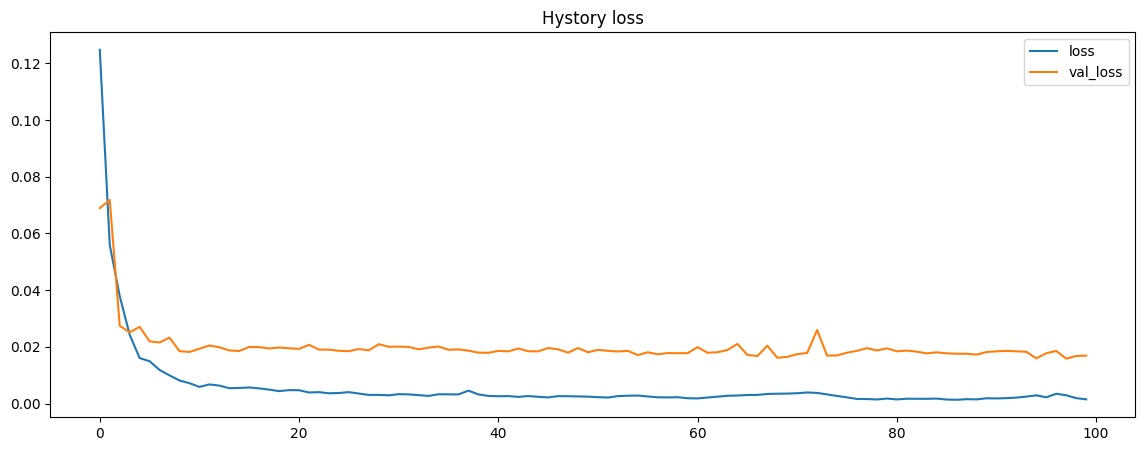

In [29]:
df_hystory = pd.DataFrame(hystory.history)
df_hystory.plot(figsize=(14, 5), title='Hystory loss')

In [30]:
predictions = model.predict(X_test)
predictions

40/40 [==============================] - 0s 1ms/step


array([[ 0.09349   ],
       [ 0.08268369],
       [-0.03250665],
       ...,
       [ 0.0675832 ],
       [ 0.03643199],
       [ 0.05552817]], dtype=float32)

In [31]:
np.unique(predictions, return_counts=True)

(array([-0.21965122, -0.21330835, -0.20621942, ...,  0.4791356 ,
         0.49196202,  0.5669756 ], dtype=float32),
 array([1, 1, 1, ..., 1, 1, 1]))